#### 연습문제 10.2.1
- (1) 붓꽃 데이터에서 꽃받침의 길이(sepal length)의 최솟값과 최댓값 구간을 0.05 간격으로 나누어 각각의 값을 기준값으로 하였을 때 조건부엔트로피가 어떻게 변하는지 그래프로 그려라.

- (2) 꽃받침의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?

- (3) 꽃받침의 폭(sepal width)에 대해 위의 분석을 실시하라. 이 때는 기준값이 어떻게 되는가?

- (4) 꽃받침의 길이(sepal length)와 꽃받침의 폭(sepal width) 중 하나를 특징으로 선택해야 한다면 어떤 것을 선택해야 하는가?

In [10]:
import matplotlib as mpl

In [11]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정

mpl.rc('axes', unicode_minus=False)

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1,2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

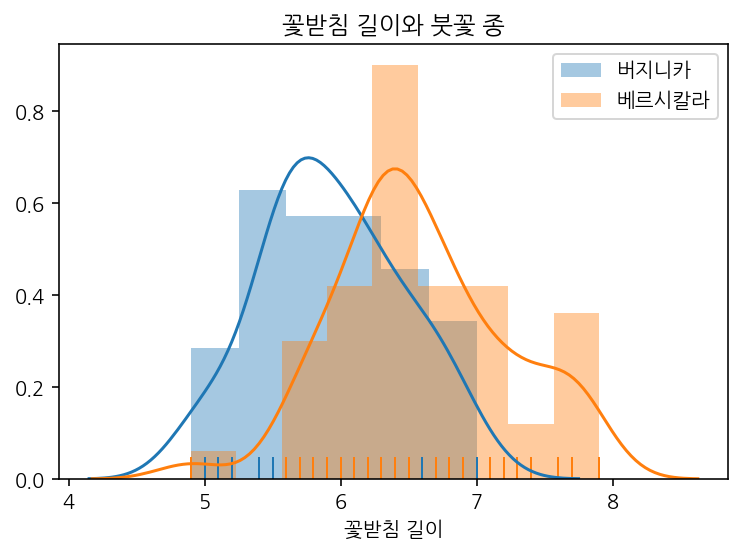

In [12]:
sns.distplot(df[df.species == 1]['sepal length (cm)'], hist=True, rug=True, label='버지니카')
sns.distplot(df[df.species == 2]['sepal length (cm)'], hist=True, rug=True, label='베르시칼라')
plt.legend()
plt.xlabel('꽃받침 길이')
plt.title('꽃받침 길이와 붓꽃 종')
plt.show()

In [13]:
df["X1"] = df["sepal length (cm)"] > 6
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1


species,1,2
X1,,
False,30,9
True,20,41


In [17]:
import scipy as sp

In [18]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.860714271586387

In [19]:
df["X1"] = df["sepal length (cm)"] > 6.5
pivot_table1 = df.groupby(["X1", "species"]).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,42,28
True,8,22


In [20]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

cond_entropy(pivot_table1.values)

0.9306576387006182

#### 연습문제 10.2.1
- (1) 붓꽃 데이터에서 꽃받침의 길이(sepal length)의 최솟값과 최댓값 구간을 0.05 간격으로 나누어 각각의 값을 기준값으로 하였을 때 조건부엔트로피가 어떻게 변하는지 그래프로 그려라.

- (2) 꽃받침의 길이를 특징으로 사용하였을 때 어떤 값을 기준값으로 하는 것이 가장 좋은가?

- (3) 꽃받침의 폭(sepal width)에 대해 위의 분석을 실시하라. 이 때는 기준값이 어떻게 되는가?

- (4) 꽃받침의 길이(sepal length)와 꽃받침의 폭(sepal width) 중 하나를 특징으로 선택해야 한다면 어떤 것을 선택해야 하는가?

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target

In [31]:
def calc_cond_entropies(col, threshold):
    df["X1"] = df[col] > threshold
    pivot_table1 = \
    df.groupby(["X1", "species"]).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)

    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX

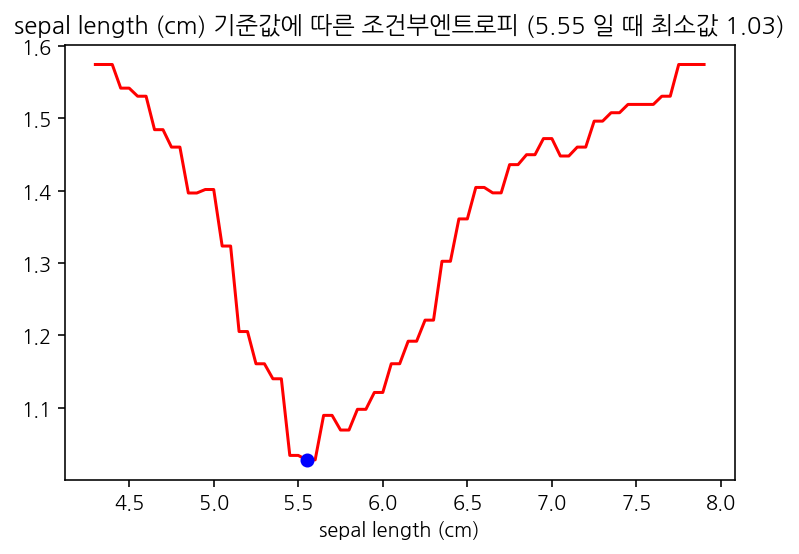

In [33]:
def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max + 0.05, 0.05)
    cond_entropies = []
    
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))
    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)

    plt.plot(th_range, cond_entropies, "r-")
    plt.plot(th_min, ce_min, "bo")

    title = "{} 기준값에 따른 조건부엔트로피 ({:.3} 일 때 최소값 {:.3})".format(col,th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()        
        
        
plot_min_cond_entropy("sepal length (cm)")

In [ ]:
#### (3) 

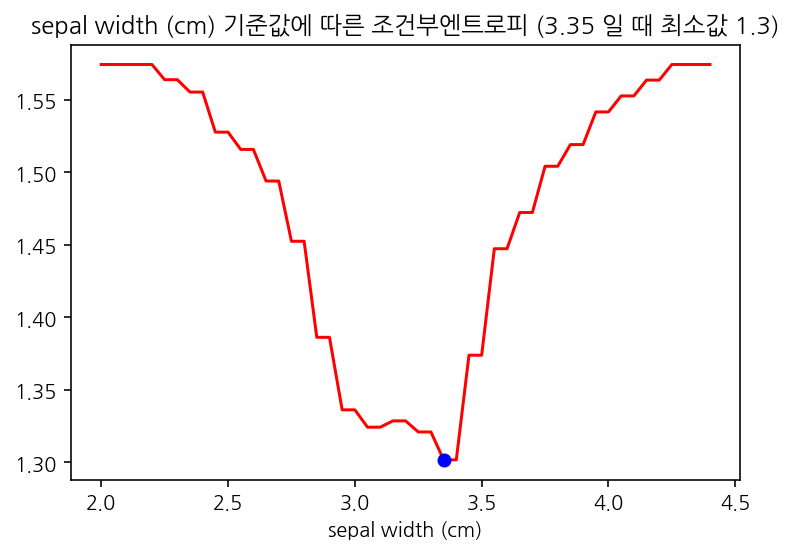

In [34]:
plot_min_cond_entropy("sepal width (cm)")